In [464]:
import pandas as pd
import numpy as np

In [465]:
x=pd.read_csv("../Pandas Dataset/dengue_features_train.csv")
y=pd.read_csv("../Pandas Dataset/dengue_labels_train.csv")
x_test=pd.read_csv("../Pandas Dataset/dengue_features_test.csv")

In [466]:
x.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [467]:
x_test.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.0189,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.0124,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0


In [468]:
x.shape

(1456, 24)

In [469]:
x.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [470]:
x_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [471]:
x['week_start_date'] = pd.to_datetime(x['week_start_date'])
x_test['week_start_date'] = pd.to_datetime(x_test['week_start_date'])

In [472]:
x['day_of_week'] = x['week_start_date'].dt.dayofweek 
x.drop("week_start_date",axis="columns",inplace=True)


x_test['day_of_week'] = x_test['week_start_date'].dt.dayofweek 
x_test.drop("week_start_date",axis="columns",inplace=True)

x.head(1)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_of_week
0,sj,1990,18,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.9,29.4,20.0,16.0,0


## Filling Missing Values Based on Feature Type
- (a) Vegetation Index Features (NDVI)
- Best Method: Use forward fill `(ffill)` or backward fill `(bfill)` since NDVI values follow trends over time.

In [473]:
x[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']] = x[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].ffill().bfill()
x_test[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']] = x_test[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].ffill().bfill()


## Weather & Climate Features
- Best Method: Use group-based mean/median filling.
- Since weather is seasonal, fill missing values by city using median or mean:

In [474]:
weather_cols = [
    'station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', 'station_precip_mm', 
    'station_diur_temp_rng_c', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
    'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
    'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'
]

for col in weather_cols:
    x[col] = x.groupby('city')[col].transform(lambda x: x.fillna(x.median()))
    
for col in weather_cols:
    x_test[col] = x_test.groupby('city')[col].transform(lambda x: x.fillna(x.median()))



## Precipitation Data
- If a small percentage is missing, fill using median per city:

In [475]:
x['precipitation_amt_mm'] = x.groupby('city')['precipitation_amt_mm'].transform(lambda x: x.fillna(x.median()))
x['reanalysis_precip_amt_kg_per_m2'] = x.groupby('city')['reanalysis_precip_amt_kg_per_m2'].transform(lambda x: x.fillna(x.median()))


x_test['precipitation_amt_mm'] = x_test.groupby('city')['precipitation_amt_mm'].transform(lambda x: x.fillna(x.median()))
x_test['reanalysis_precip_amt_kg_per_m2'] = x_test.groupby('city')['reanalysis_precip_amt_kg_per_m2'].transform(lambda x: x.fillna(x.median()))


## Alternative: Use Interpolation
- For time-series data, linear interpolation works well:
```
df.interpolate(method='linear', inplace=True)
```

In [476]:
x.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
day_of_week

In [477]:
x.isna().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
day_of_week

In [478]:
x_test.isna().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
day_of_week

In [479]:
x.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [480]:
dummies1=pd.get_dummies(x.city)
dummies2=pd.get_dummies(x_test.city)

In [481]:
x=pd.concat([x,dummies1],axis="columns")
x_test=pd.concat([x_test,dummies2],axis="columns")

In [482]:
x=x.drop(columns=["city"])
x_test=x_test.drop(columns=["city"])

In [483]:
x_test.isna().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
day_of_week                              0
iq         

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt

In [485]:
x.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_of_week,iq,sj
year,1.000000,-0.071649,0.200449,0.147472,0.250522,0.279822,0.207720,-0.142055,0.084201,0.132621,...,0.162102,0.491952,0.052919,0.387575,0.233465,-0.216409,0.219978,0.043408,0.547101,-0.547101
weekofyear,-0.071649,1.000000,0.023819,0.034657,0.102724,0.064415,0.117899,0.420955,0.458867,0.345299,...,0.347141,0.076920,0.361190,0.024030,0.230506,0.287262,0.065265,0.000518,0.000020,-0.000020
ndvi_ne,0.200449,0.023819,1.000000,0.824107,0.586109,0.645100,0.197013,-0.334422,-0.040208,0.052121,...,0.088942,0.667671,0.185641,0.665624,0.481527,-0.308064,0.232311,-0.014301,0.712540,-0.712540
ndvi_nw,0.147472,0.034657,0.824107,1.000000,0.554892,0.651769,0.189560,-0.319394,-0.032613,0.062320,...,0.099747,0.647732,0.202692,0.656713,0.487998,-0.305967,0.217880,-0.065750,0.690637,-0.690637
ndvi_se,0.250522,0.102724,0.586109,0.554892,1.000000,0.814252,0.080969,-0.161181,0.049979,0.001669,...,0.028352,0.490709,0.088714,0.455619,0.288623,-0.256610,0.131348,-0.021878,0.475904,-0.475904
ndvi_sw,0.279822,0.064415,0.645100,0.651769,0.814252,1.000000,0.127279,-0.227479,0.022938,0.021016,...,0.053987,0.568927,0.125290,0.550321,0.377985,-0.294560,0.158579,-0.096603,0.577196,-0.577196
precipitation_amt_mm,0.207720,0.117899,0.197013,0.189560,0.080969,0.127279,1.000000,-0.017894,0.106977,0.434772,...,0.451442,0.204055,0.225534,0.196228,0.295500,0.074338,0.485130,-0.006126,0.317786,-0.317786
reanalysis_air_temp_k,-0.142055,0.420955,-0.334422,-0.319394,-0.161181,-0.227479,-0.017894,1.000000,0.901267,0.528681,...,0.507093,-0.282531,0.601497,-0.278307,0.217685,0.720071,-0.173901,0.079441,-0.456777,0.456777
reanalysis_avg_temp_k,0.084201,0.458867,-0.040208,-0.032613,0.049979,0.022938,0.106977,0.901267,1.000000,0.614065,...,0.612220,0.123241,0.737319,0.093148,0.504304,0.579602,-0.047490,0.073533,-0.055128,0.055128
reanalysis_dew_point_temp_k,0.132621,0.345299,0.052121,0.062320,0.001669,0.021016,0.434772,0.528681,0.614065,1.000000,...,0.997037,-0.032565,0.730350,0.031470,0.488128,0.648138,0.239001,0.003011,0.120842,-0.120842


<Axes: >

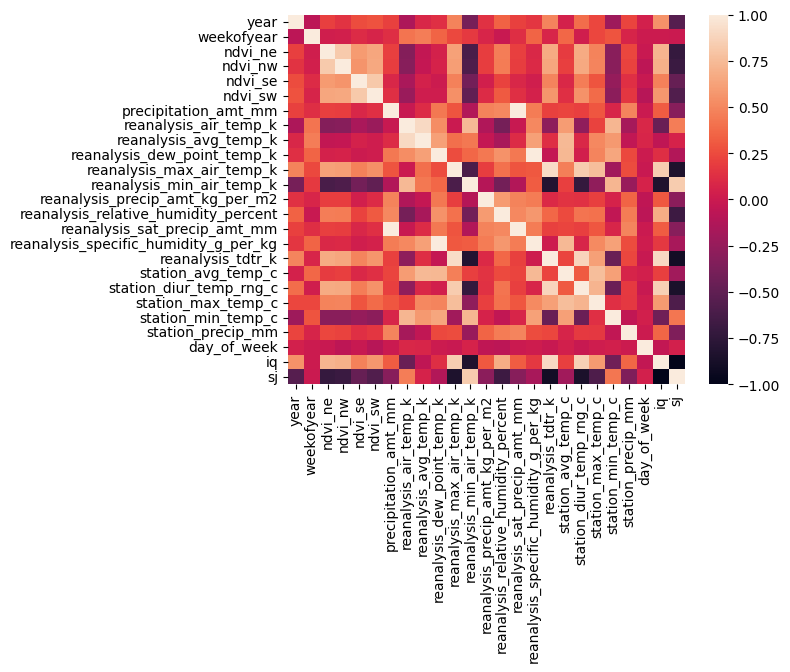

In [486]:
sns.heatmap(x.corr())

In [487]:
matrix=x.corr()

In [488]:
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print(upper)
# Find features with high correlation
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
print(high_corr_features)

                                       year  weekofyear   ndvi_ne   ndvi_nw  \
year                                    NaN    0.071649  0.200449  0.147472   
weekofyear                              NaN         NaN  0.023819  0.034657   
ndvi_ne                                 NaN         NaN       NaN  0.824107   
ndvi_nw                                 NaN         NaN       NaN       NaN   
ndvi_se                                 NaN         NaN       NaN       NaN   
ndvi_sw                                 NaN         NaN       NaN       NaN   
precipitation_amt_mm                    NaN         NaN       NaN       NaN   
reanalysis_air_temp_k                   NaN         NaN       NaN       NaN   
reanalysis_avg_temp_k                   NaN         NaN       NaN       NaN   
reanalysis_dew_point_temp_k             NaN         NaN       NaN       NaN   
reanalysis_max_air_temp_k               NaN         NaN       NaN       NaN   
reanalysis_min_air_temp_k               NaN         

Yes! Let’s break it down step by step:  

```python
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
```

### **Understanding Each Part**  

#### **1. `corr_matrix`**
- This is your **correlation matrix**, where each value represents the correlation between two features.  

#### **2. `np.ones(corr_matrix.shape)`**
- Creates a matrix of **ones** with the same shape as `corr_matrix`.  

#### **3. `np.triu(..., k=1)`**
- `np.triu()` extracts the **upper triangular** part of the matrix.  
- `k=1` ensures that the **diagonal values are excluded** (only above-diagonal elements remain).  

#### **4. `.astype(bool)`**
- Converts the **upper triangular matrix** into a Boolean mask (`True` for upper part, `False` elsewhere).  

#### **5. `corr_matrix.where(...)`**
- The `.where()` function **keeps only the upper triangular values** and replaces others with `NaN`.  

---

### **Final Output (`upper`)**
This operation **removes duplicate correlations** (since correlation matrices are symmetric) and **ignores self-correlation (diagonal elements)**.  

### **Example**
If `corr_matrix` is:
```
   A    B    C
A  1  0.8  0.5
B  0.8  1  0.3
C  0.5  0.3  1
```
Then `upper` will be:
```
   A    B    C
A NaN  0.8  0.5
B NaN  NaN  0.3
C NaN  NaN  NaN
```

---

### **Use Case**
This is **commonly used for feature selection** to remove highly correlated features in datasets. 🚀 Let me know if you need more clarification!

Let's break this line down:

```python
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
```

### **Understanding Each Part**
1. **`upper.columns`**
   - This refers to the column names of the **upper triangular correlation matrix** (`upper`), meaning it iterates through each feature in the dataset.

2. **`any(upper[column] > 0.85)`**
   - For each column (feature), this checks **if any value in that column is greater than `0.85`**.
   - This means we are looking for features that have a strong correlation (`> 0.85`) with at least one other feature.

3. **`[column for column in upper.columns if ...]`**
   - This is a **list comprehension** that collects all feature names that meet the condition (i.e., have a correlation greater than `0.85` with another feature).

---

### **What Does This Do?**
It **identifies highly correlated features** (correlation > 0.85) so that they can be removed to avoid multicollinearity in machine learning models.

---

### **Example**
#### **Suppose `upper` looks like this:**
```
   A     B     C     D
A NaN  0.90  0.50  0.70
B NaN   NaN  0.88  0.20
C NaN   NaN   NaN  0.60
D NaN   NaN   NaN   NaN
```
- **Feature `A` and `B` have 0.90 (strong correlation)**
- **Feature `B` and `C` have 0.88 (strong correlation)**

👉 **`high_corr_features = ['A', 'B', 'C']`**  
(since they have correlations > 0.85 with another feature)

---

### **Why Is This Useful?**
- Removing **highly correlated features** helps in **reducing redundancy**.
- It improves model **interpretability** and **prevents overfitting**.

Let me know if you need further clarification! 🚀

In [ ]:
x = x.drop(columns=high_corr_features[:2]) # i think sj an iq columns are importatnt so i skipped the last 2 columns
x_test = x_test.drop(columns=high_corr_features[:2])

# Compute the new correlation matrix
new_corr_matrix = x.corr()

<Axes: >

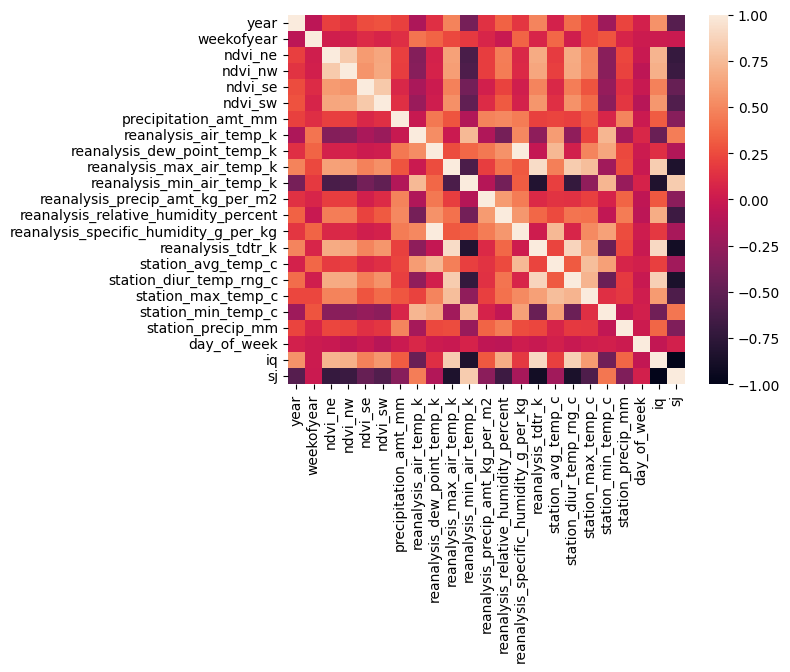

In [490]:
sns.heatmap(new_corr_matrix)

<Axes: >

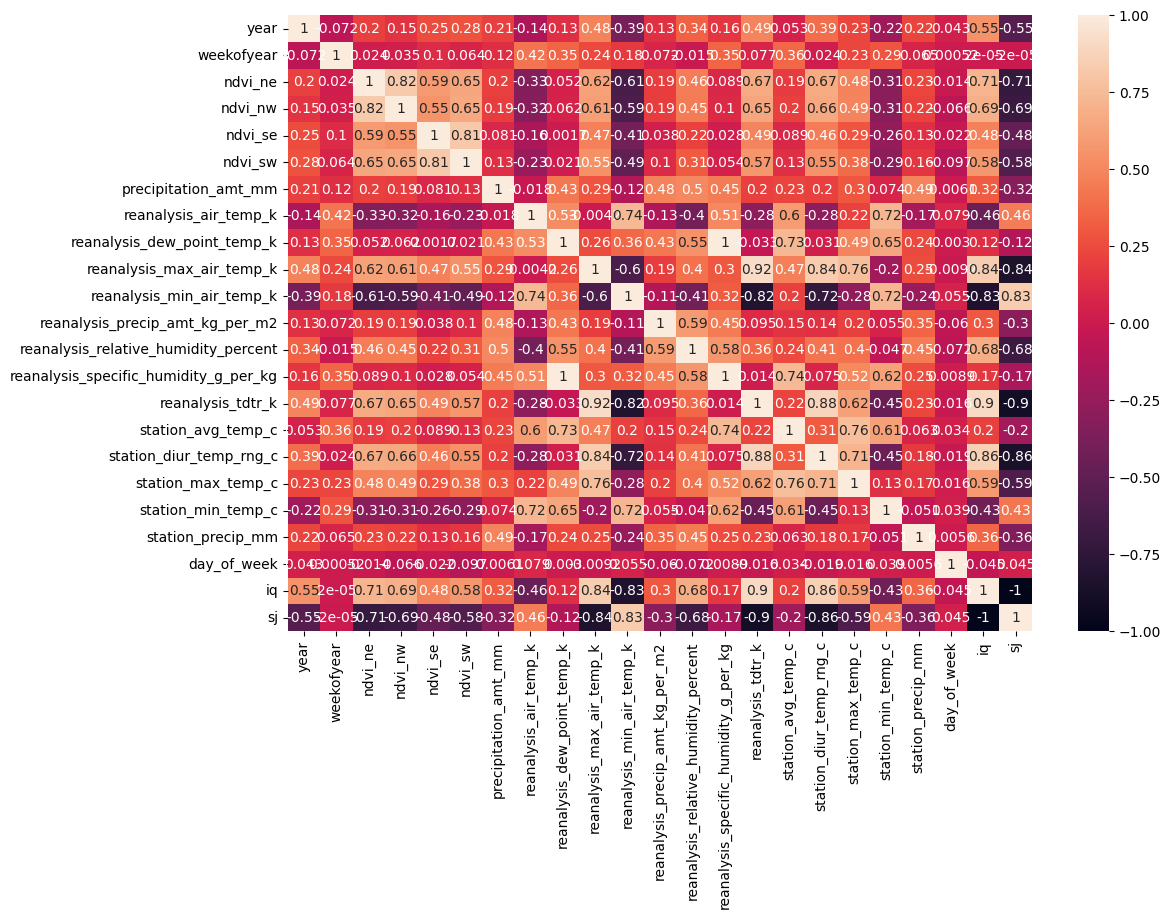

In [491]:
plt.subplots(figsize=(12,8))
sns.heatmap(x.corr(),annot=True)

In [492]:
x.head(3)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_of_week,iq,sj
0,1990,18,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,292.414286,299.8,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,False,True
1,1990,19,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,293.951429,300.9,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,False,True
2,1990,20,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,295.434286,300.5,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,False,True


In [493]:
x_test.head(3)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_of_week,iq,sj
0,2008,18,-0.0189,-0.0189,0.102729,0.091200,78.60,298.492857,294.527143,301.1,...,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,False,True
1,2008,19,-0.0180,-0.0124,0.082043,0.072314,12.56,298.475714,294.395714,300.8,...,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,False,True
2,2008,20,-0.0015,-0.0124,0.151083,0.091529,3.66,299.455714,295.308571,302.2,...,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,False,True


In [494]:
y.head(3)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4


In [495]:
print(y.max())
print(y.min())

city             sj
year           2010
weekofyear       53
total_cases     461
dtype: object
city             iq
year           1990
weekofyear        1
total_cases       0
dtype: object


In [496]:
y=y["total_cases"]
y.head(5)

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [497]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_validate
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=10)

In [498]:
model = RandomForestRegressor()

In [499]:
cross_val_score(model,x,y,cv=cv)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Min samples in a leaf node
    "max_features": ["sqrt", "log2"],  # Features per split
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=3
)

# Fit the model
grid_search.fit(x, y)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: -20.3277


In [500]:
best_params={'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

In [501]:
model=RandomForestRegressor(**best_params)

In [502]:
model.fit(x,y)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [503]:
x_test.shape

(416, 23)

In [504]:
x_test.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
day_of_week                              0
iq                                       0
sj                                       0
dtype: int6

In [505]:
y_pred=model.predict(x_test)

In [506]:
y_pred.max()

86.10529806959437

In [507]:
int_predictions = [round(pred) for pred in y_pred]

In [508]:
int_predictions

[9,
 9,
 12,
 18,
 16,
 15,
 13,
 23,
 19,
 22,
 20,
 20,
 25,
 27,
 40,
 52,
 36,
 49,
 86,
 57,
 50,
 46,
 46,
 41,
 38,
 32,
 46,
 32,
 39,
 31,
 27,
 22,
 19,
 22,
 15,
 17,
 12,
 18,
 14,
 17,
 10,
 14,
 11,
 12,
 9,
 12,
 10,
 8,
 9,
 7,
 7,
 10,
 10,
 10,
 16,
 13,
 19,
 12,
 20,
 16,
 15,
 21,
 30,
 28,
 35,
 39,
 38,
 39,
 44,
 56,
 59,
 38,
 52,
 43,
 66,
 58,
 52,
 43,
 44,
 39,
 28,
 38,
 30,
 29,
 26,
 27,
 22,
 24,
 17,
 14,
 21,
 17,
 14,
 14,
 16,
 10,
 15,
 15,
 10,
 15,
 14,
 10,
 9,
 10,
 18,
 21,
 12,
 19,
 16,
 46,
 48,
 40,
 34,
 38,
 52,
 58,
 39,
 39,
 46,
 78,
 68,
 77,
 84,
 72,
 70,
 52,
 45,
 50,
 65,
 38,
 44,
 34,
 39,
 24,
 21,
 20,
 20,
 21,
 19,
 20,
 17,
 18,
 16,
 13,
 12,
 11,
 10,
 11,
 11,
 9,
 9,
 8,
 9,
 10,
 9,
 10,
 7,
 15,
 9,
 15,
 22,
 22,
 23,
 40,
 44,
 39,
 33,
 39,
 30,
 53,
 36,
 60,
 46,
 66,
 46,
 37,
 47,
 36,
 49,
 46,
 40,
 31,
 25,
 32,
 29,
 27,
 33,
 32,
 23,
 33,
 22,
 22,
 19,
 15,
 12,
 15,
 12,
 13,
 10,
 13,
 8,
 8,
 8,
 9,

In [509]:
x_test=pd.read_csv("../Pandas Dataset/dengue_features_test.csv")

In [510]:
# Sample dataset with city, year, and weekofyear (Replace with actual data)
df = pd.DataFrame({
    "city": x_test.city,
    "year": x_test.year,
    "weekofyear": x_test.weekofyear
})

# Sample predicted total_cases (Replace with actual predictions)
df_predictions = pd.DataFrame({
    "total_cases": int_predictions
})

# Merge predictions with the dataset
df["total_cases"] = df_predictions["total_cases"]
df.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,9
1,sj,2008,19,9
2,sj,2008,20,12
3,sj,2008,21,18
4,sj,2008,22,16


In [511]:
df["total_cases"] =df["total_cases"].fillna(0).astype("int")

In [512]:
df.to_csv("predicting_DengAI.csv",index=False)

- Best score 26.1490
- Current rank #2758
